Considerando a base de dados de populacao_brasileira.json responda as
questões abaixo (os dados são fictícios).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
df = pd.read_csv('populacao_brasileira.csv')

In [ ]:
df.head()

,Unnamed: 0,estado,idade,escolaridade,nível de proficiência em inglês,renda,sexo
0,0,MA,56,Fundamental,Intermediário,4006.29,F
1,1,BA,46,Superior,Básico,2423.11,M
2,2,AM,32,Fundamental,Intermediário,3835.69,M
3,3,CE,60,Superior,Básico,1870.29,M
4,4,SE,25,Fundamental,Avançado,3529.80,M


In [ ]:
df.describe()

,Unnamed: 0,idade,renda
count,1000.000000,1000.000000,1000.000000
mean,499.500000,40.986000,3082.537180
std,288.819436,13.497852,996.572239
min,0.000000,18.000000,103.740000
25%,249.750000,29.000000,2425.815000
50%,499.500000,42.000000,3076.415000
75%,749.250000,52.000000,3714.487500
max,999.000000,64.000000,5632.380000


Você é uma pesquisadora desenvolvendo uma análise sobre as
características da força de trabalho nos estados brasileiros. Responda as
perguntas abaixo:


1. Considere pessoas fluentes em inglês, qual a probabilidade
complementar? Ou seja, qual a probabilidade de escolhermos uma
pessoa aleatória e ela não ser fluente em inglês. Considere fluente
quem tem o nível avançado.

In [ ]:
#Coluna relevante: nível de proficiência em inglês
#Evento de interesse (o que iremos filtrar): pessoas com nível avançado
#População: total
#Estatística: evento complementar

In [ ]:
populacao_total = df.shape[0]
df_ingles_fluente = df[df['nível de proficiência em inglês'] == "Avançado"].shape[0]

#utilizando o módulo stats.binom.cdf(k, n, p)
#cdf: função de distribuição acumulada, valor acumulado, qual a chance de escolhermos no >máximo< 1 pessoa (ou seja, 0 ou 1 pessoa) aleatória e ela ser fluente em inglês?
#k: número de sucessos
#n: número de tentativas
#p: probabilidade de sucesso em cada tentativa

prob_binomial = stats.binom.cdf(df_ingles_fluente, populacao_total, df_ingles_fluente/populacao_total)

#calculando o evento complementar
evento_complementar = (1 - prob_binomial)*100

In [ ]:
print('A probabilidade complementar será: ', evento_complementar)

A probabilidade complementar será:  48.534594015829605


2. Se uma pessoa escolhida aleatoriamente for de Alagoas ou do Pará,
qual é a probabilidade de ela ter uma renda superior a 5 mil reais?

In [ ]:
#Coluna relevante: escolaridade, renda
#Evento de interesse (o que iremos filtrar): pessoas de Alagoas ou Pará com renda superior a 5k
#População: Pessoas de Alagoas e Pará
#Estatística: condicional

In [ ]:
filtro_alagoas_para = df[(df['estado'] == "AL") | (df['estado'] == "PA")]
total_estado = filtro_alagoas_para.shape[0]

filtro_renda_sup_5k = filtro_alagoas_para[filtro_alagoas_para['renda'] > 5000]
total_renda = filtro_renda_sup_5k.shape[0]

prob_condicional = total_renda/total_estado
prob_condicional = prob_condicional*100

In [ ]:
print('A probabilidade será de: ', prob_condicional)

A probabilidade será de:  5.063291139240507


3. Descubra a probabilidade de uma pessoa ter ensino superior completo
no estado do Amazonas. Qual a probabilidade da quinta pessoa que
você conversar, que é amazonense, ter ensino superior completo?

In [ ]:
#Coluna relevante: escolaridade, estado
#Evento de interesse (o que iremos filtrar): pessoas do amazonas com ensino superior
#População: pessoas do Amazonas
#Estatística: geométrica

In [ ]:
#Calculando a probabilidade de uma pessoa ter ensino superior no Amazonas
filtro_amazonas = df[df['estado'] == "AM"]
total_amazonas = filtro_amazonas.shape[0]

filtro_amazonas_sup = filtro_amazonas[filtro_amazonas['escolaridade'] == "Superior"]
total_amazonas_sup = filtro_amazonas_sup.shape[0]

prob_condicional_AM = total_amazonas_sup/total_amazonas


In [ ]:
print('A probabilidade de uma pessoas ter ensino superior no Amazonas é: ', round(prob_condicional_AM*100,2))

A probabilidade de uma pessoas ter ensino superior no Amazonas é:  23.68


In [ ]:
#utilizando o módulo stats.geom.pmf(k, p)
#pmf: função de massa de probabilidade da distribuição geométrica, vamos modelar o núm exato de tentativas até o primeiro sucesso
#k: número de tentativas até o primeiro sucesso
#p: probabilidade de sucesso em cada tentativa, população
prob_geo_AM = stats.geom.pmf(5, prob_condicional_AM)

In [ ]:
print('A probabilidade da 5ª pessoa amazonense ter ensino superior é: ', round(prob_geo_AM*100,2))

A probabilidade da 5ª pessoa amazonense ter ensino superior é:  8.03


4. Considerando a renda das pessoas do nosso conjunto, podemos dizer
que a renda de uma pessoa brasileira está na sua maioria em que faixa
(faça faixa de 1.500 reais)? Qual é a sua função densidade de
probabilidade?

In [ ]:
#Coluna relevante: renda
#Evento de interesse (o que iremos filtrar): distribuição de renda
#População: todos
#Estatística: função de densidade (histograma)

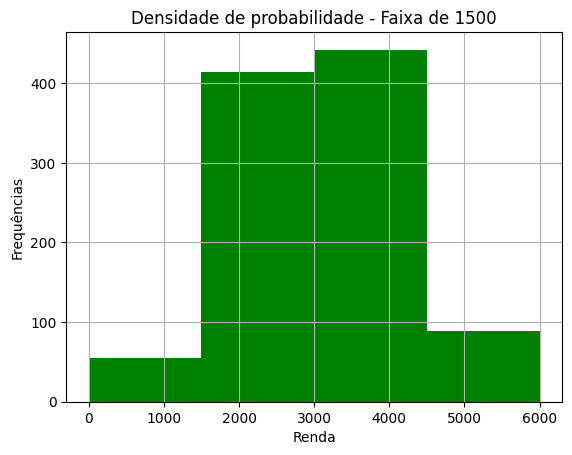

In [ ]:
faixa_1500 = np.arange(0, df['renda'].max() + 1500, 1500)
contar_faixa = np.histogram(df['renda'], bins = faixa_1500)

plt.hist(df['renda'], bins=faixa_1500, color='green')
plt.title('Densidade de probabilidade - Faixa de 1500')
plt.xlabel('Renda')
plt.ylabel('Density')
plt.grid(True)
plt.show()

5. Calcule a média e a variância da renda da amostra. Depois faça a
distribuição normal, inclua o gráfico.

In [ ]:
#Coluna relevante: renda
#Evento de interesse (o que iremos filtrar): variância, média
#População: todos
#Estatística: distribuição normal

In [ ]:
renda_media = df['renda'].mean()
renda_variancia = df['renda'].var() #lembrando que a variância é: desvio padrão ao quadrado = std * std

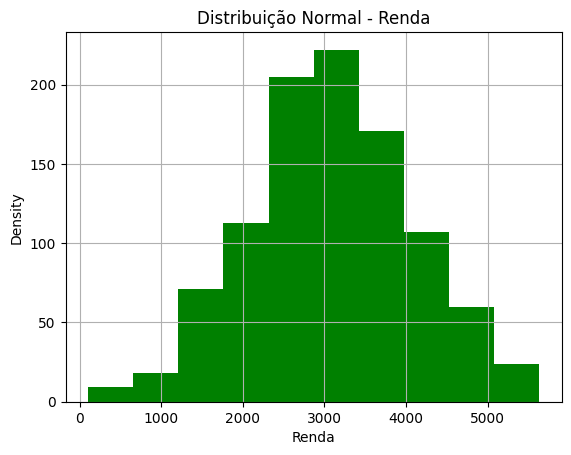

In [ ]:
plt.hist(df['renda'],color='green')
plt.title('Distribuição Normal - Renda')
plt.xlabel('Renda')
plt.ylabel('Density')
plt.grid(True)
plt.show()

6. Primeiro considere a probabilidade encontrada no nosso conjunto de
pessoas com escolaridade de pós-graduação. Considerando a amostra
de população brasileira com 1 milhão de habitantes, qual a
probabilidade de encontrarmos 243 mil pessoas com pós-graduação?

In [ ]:
#Coluna relevante: escolaridade
#Evento de interesse (o que iremos filtrar): pessoas com pós graduação
#População: 243k
#Estatística: binomial

In [ ]:
#Verificando como está pós-graduação no df
df['escolaridade'].unique()

array(['Fundamental', 'Superior', 'Médio', 'Pós-graduação'], dtype=object)

In [ ]:
#calculando a probabilidade de pessoas com pós
populacao_bra = df.shape[0]
filtro_pos = df[df['escolaridade'] == "Pós-graduação"].shape[0]
prob_pessoas_pos = filtro_pos/populacao_bra

#utilizando o módulo stats.binom.pmf(k, n, p)
#pmf: função de massa de probabilidade, calculamos um valor exato, probabilidade de termos exatamente 243k pessoas com pós
#k: número de sucessos
#n: número de tentativas
#p: probabilidade de sucesso em cada tentativa

prob_bimon_243k = stats.binom.pmf(243000,1000000,prob_pessoas_pos)

In [ ]:
print('A probabilidade de pessoas com pós graduação será de: ', prob_bimon_243k)

A probabilidade de pessoas com pós graduação será de:  1.1104854289794913e-119


7. Somando as densidades nós temos a função de densidade acumulada.
Considerando a coluna ‘Escolaridade’ faça a função de densidade
acumulada discreta para cada nível de escolaridade.

In [ ]:
#Coluna relevante: escolaridade
#Evento de interesse (o que iremos filtrar): densidade acumulada discreta da escolaridade
#População: todos
#Estatística: densidade acumulada

In [ ]:
#calculando a densidade de cada nível
den_escolaridade = df['escolaridade'].value_counts()
den_escolaridade = den_escolaridade/len(df)
den_escolaridade

,count
escolaridade,
Fundamental,0.266
Pós-graduação,0.253
Superior,0.243
Médio,0.238


In [ ]:
#ordenando os índices pelo níveis, logo após resentando os índices para que a escolaridade se torne uma variável novamente, por último renomeando a coluna count para f(x)
ordem_indices = ['Fundamental', 'Médio', 'Superior', 'Pós-graduação']
den_escolaridade = den_escolaridade.reindex(ordem_indices)
den_escolaridade = den_escolaridade.reset_index()
den_escolaridade.rename(columns={'count' : 'f(X): frequência'},inplace=True)

#utilizando cumsum para calcular a densidade acumulada
den_escolaridade['F(X): den. acumulada'] = den_escolaridade['f(X): frequência'].cumsum()
den_escolaridade

,escolaridade,f(X): frequência,F(X): den. acumulada
0,Fundamental,0.266,0.266
1,Médio,0.238,0.504
2,Superior,0.243,0.747
3,Pós-graduação,0.253,1.000


8. Qual a margem de erro amostral da proporção populacional
considerando a proporção de pessoas com nível de inglês
intermediário?

In [ ]:
#Coluna relevante: nível de proficiência em inglês
#Evento de interesse (o que iremos filtrar): margem de erro amostral considerando a pessoas com nível de inglês intermediário
#População: pessoas com nível de inglês intermediário
#Estatística: margem de erro amostral

In [ ]:
#calculando a probabilidade de pessoas com inglês intermediário
filtro_ingles_int = df[df['nível de proficiência em inglês'] == 'Intermediário'].shape[0]
prob_ingles_int = filtro_ingles_int / df.shape[0]

#Levando em conta 1.96 como norma padrão para Z-score, onde 1.96 considera o intervalo de confiança de 95%
#Utilizamos a fórmula: z * np.sqrt((p * (1 - p)) / n)
#z: z-score = 1.96
#np.sqrt: função de raiz quadrada do numpy
#p: probabilidade do evento
#n: população total
margem_erro_amostral = 1.96 * np.sqrt((prob_ingles_int * (1 - prob_ingles_int)) / len(df))

In [ ]:
print(f'A margem de erro amostral é de: {margem_erro_amostral: .2%}')

A margem de erro amostral é de:  2.91%


9. Calcula a renda da população. Qual a probabilidade de encontrar 60
pessoas com uma renda mil reais superior à média?

In [ ]:
#Coluna relevante: renda
#Evento de interesse (o que iremos filtrar): pessoas com renda mil reais superior a média
#População: todos
#Estatística: função de distribuição de massa da distribuição binomial

In [17]:
#Probabilidade de pessoas do df com renda 1k acima da média
media_renda = df['renda'].mean()
renda_acima = df[df['renda'] > (media_renda + 1000)]
prob_renda_acima = len(renda_acima) / len(df)

#utilizando a função de distribuição de massa da binomial para calcular a probabilidade de encontrar 60 pessoas
#fórmula: stats.binom.pmf(k, n, p)
#pmf: função de massa de probabilidade, vamos modelar a probabilidade de termos exatamente 60 pessoas com uma renda 1k acima da média
#k: número de sucessos
#n: número de tentativas
#p: probabilidade de sucesso em cada tentativa

k = 60
n = len(df)
prob_60p = stats.binom.pmf(k, n, prob_renda_acima)


In [23]:
print('A probabilidade de encontrar 60 pessoas com uma renda mil reais superior à média é de: ', prob_60p)

A probabilidade de encontrar 60 pessoas com uma renda mil reais superior à média é de:  1.099520565163774e-22


10. Qual a probabilidade de escolhermos alguém do Sudeste que seja
homem, com ensino fundamental e com renda maior que 2 mil reais por
mês?

In [ ]:
#Coluna relevante: estado, sexo, escolaridade, renda
#Evento de interesse (o que iremos filtrar): pessoa do sudeste, homem, com ensino fundamental completo, renda > 2000
#População: todos
#Estatística: condicional

In [11]:
filtro_cond = df[(df['estado'].isin(['SP','RJ,','ES','MG'])) & (df['sexo'] == "M") & (df['escolaridade'] == "Fundamental") & (df['renda'] > 2000)]

prob_condicional_pop = len(filtro_cond) / len(df)


In [12]:
print('A probabilidade será de: ', round(prob_condicional_pop*100,2))

A probabilidade será de:  1.4
